In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time

import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config, make_date_key_str
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml
import wandb

In [3]:
predictions_dict = {}

In [8]:
config_filename = 'uncer.yaml'
config = read_config(config_filename)

wandb_config = read_config(config_filename, preprocess=False)
wandb_config = make_date_key_str(wandb_config)

In [9]:
alpha = 10
beta =  0.11
from scipy.stats import invgamma as inv
inv.rvs(a = alpha ,scale = beta , size = 1 )[0]

0.01168328125826946

In [10]:
output_folder = '../../misc/reports/{}'.format(datetime.datetime.now().strftime("%Y_%m%d_%H%M%S"))

## Perform M1 and M2 fits

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 0/15000 [00:00<?, ?it/s]

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_08122020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0            | 241935.0            | 243169.0   

  0%|          | 9/15000 [00:00<03:02, 82.04it/s]

The acceptance ratio is -------->  0.06306666666666666
The explored steps are -------->  484
The optimized steps are -------->  462


 76%|███████▌  | 11422/15000 [01:43<00:31, 112.80it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
  0%|          | 11/15000 [00:00<02:27, 101.70it/s]

The acceptance ratio is -------->  0.06573333333333334
The explored steps are -------->  458
The optimized steps are -------->  528


  0%|          | 11/15000 [00:00<02:16, 109.58it/s]

The acceptance ratio is -------->  0.07046666666666666
The explored steps are -------->  520
The optimized steps are -------->  537


100%|██████████| 15000/15000 [02:09<00:00, 115.43it/s]


The acceptance ratio is -------->  0.06333333333333334
The explored steps are -------->  449
The optimized steps are -------->  501


../../uncertainty/mcmc_utils.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  accumulator[key] = d1[key]/d2[key]
  1%|          | 11/1500 [00:00<00:14, 105.90it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0152124682062593,
    'I_hosp_ratio': 1.0658271158384143,
    'P_fatal': 1.011879564375965,
    'T_inc': 1.0172339918043127,
    'T_inf': 1.0730090302038466,
    'T_recov': 1.040711561868181,
    'T_recov_fatal': 1.0407320974191483,
    'gamma': 0.9998666577765923,
    'lockdown_R0': 1.0071913468290268}


100%|██████████| 1500/1500 [00:13<00:00, 113.87it/s]


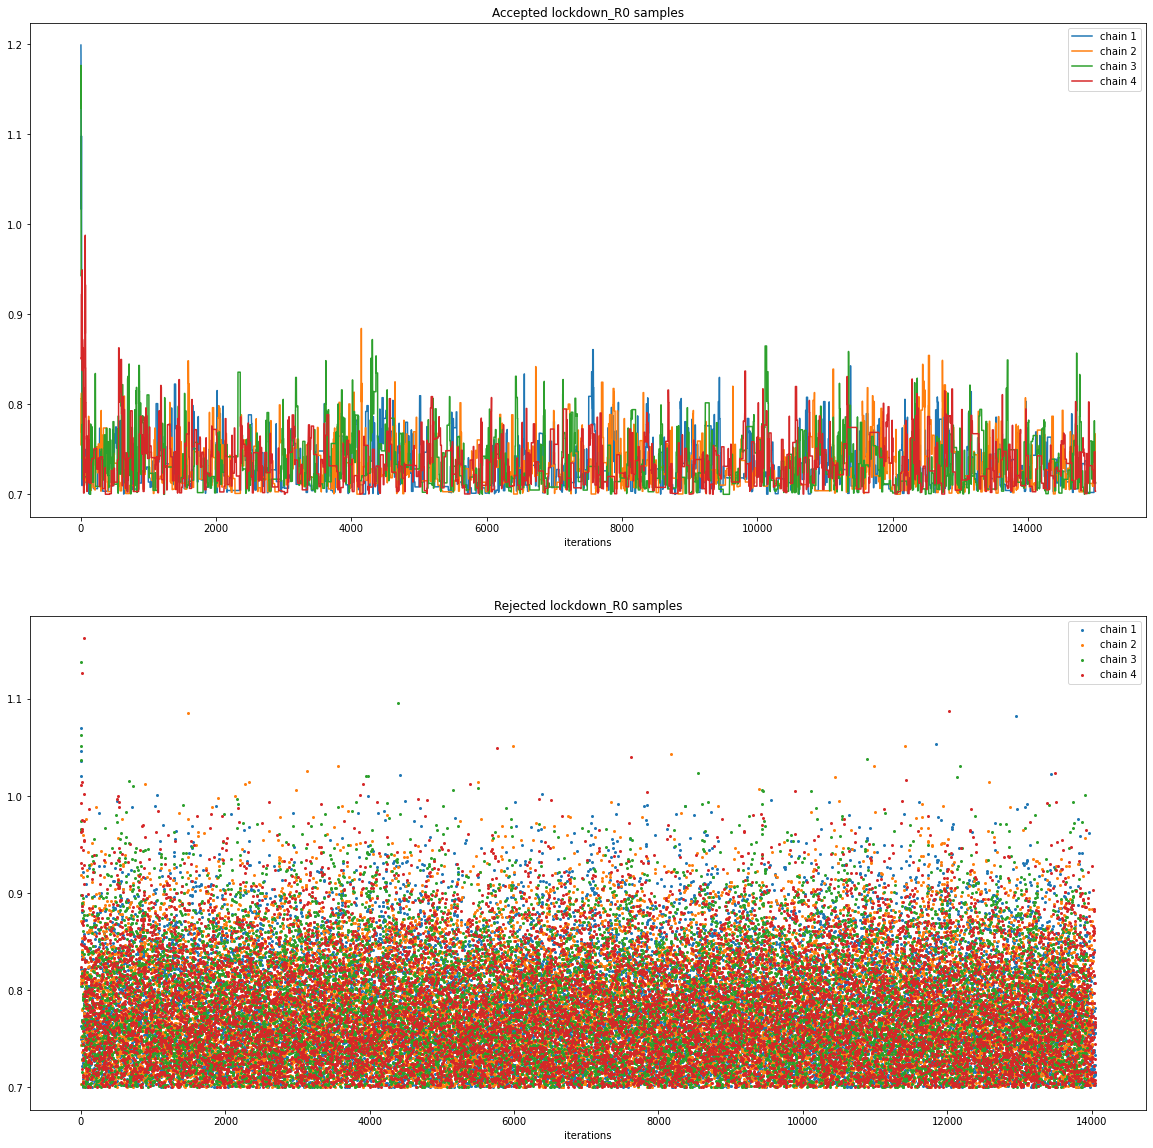

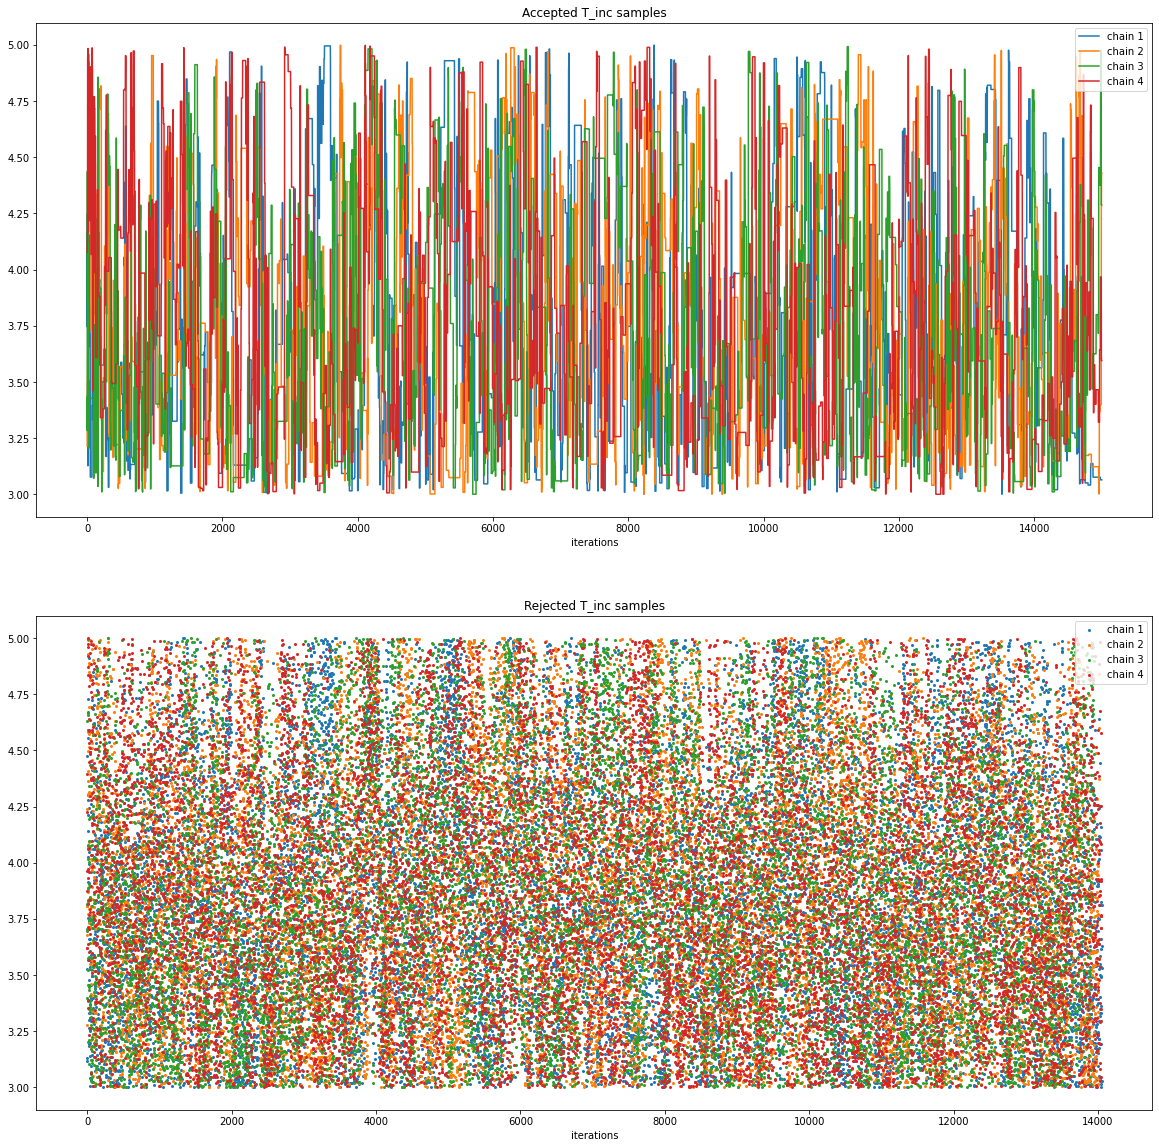

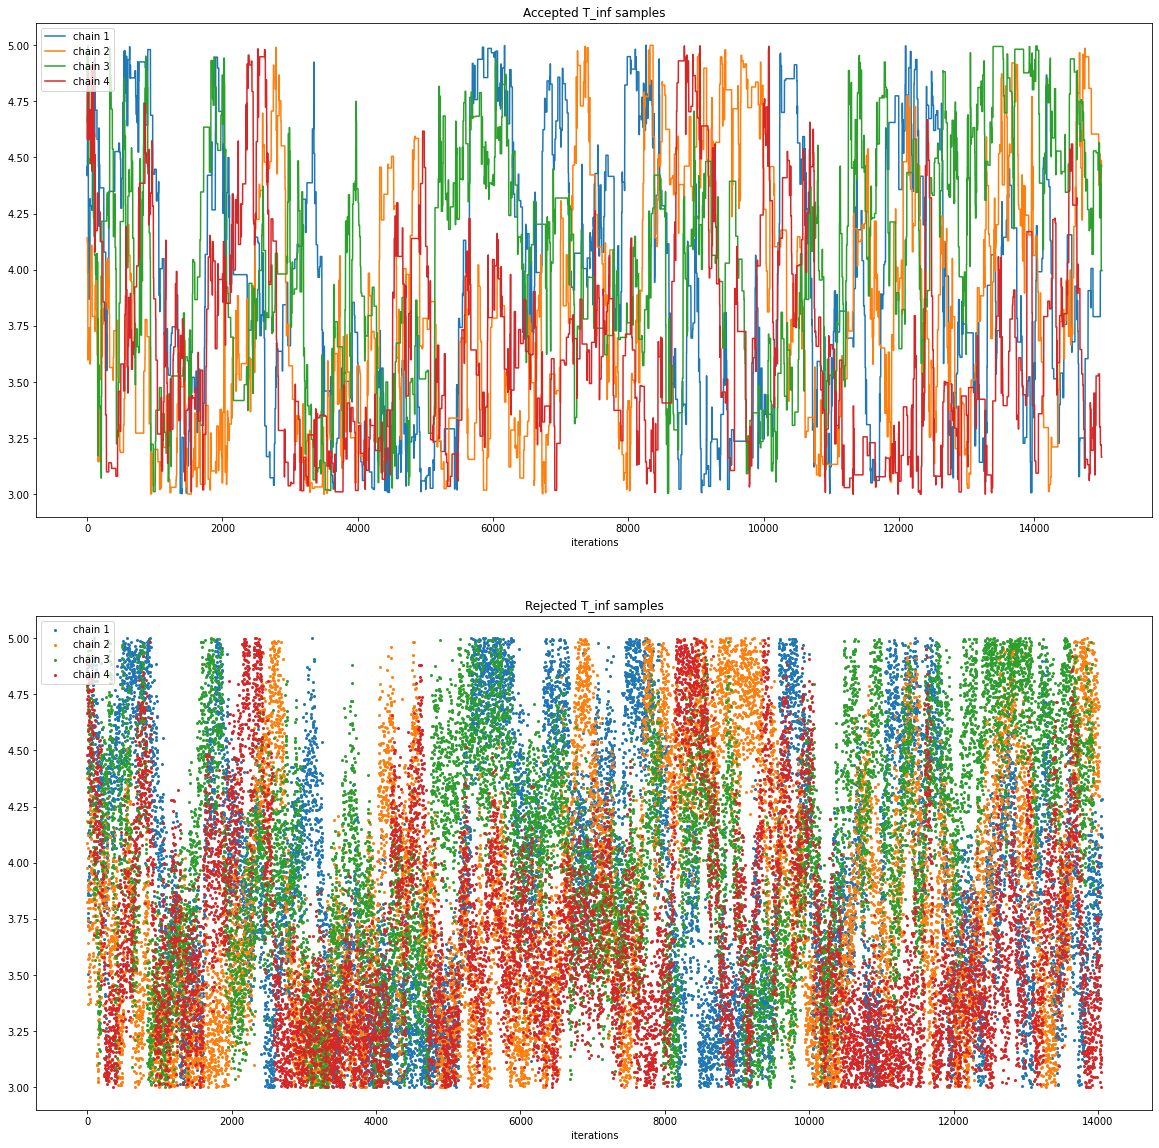

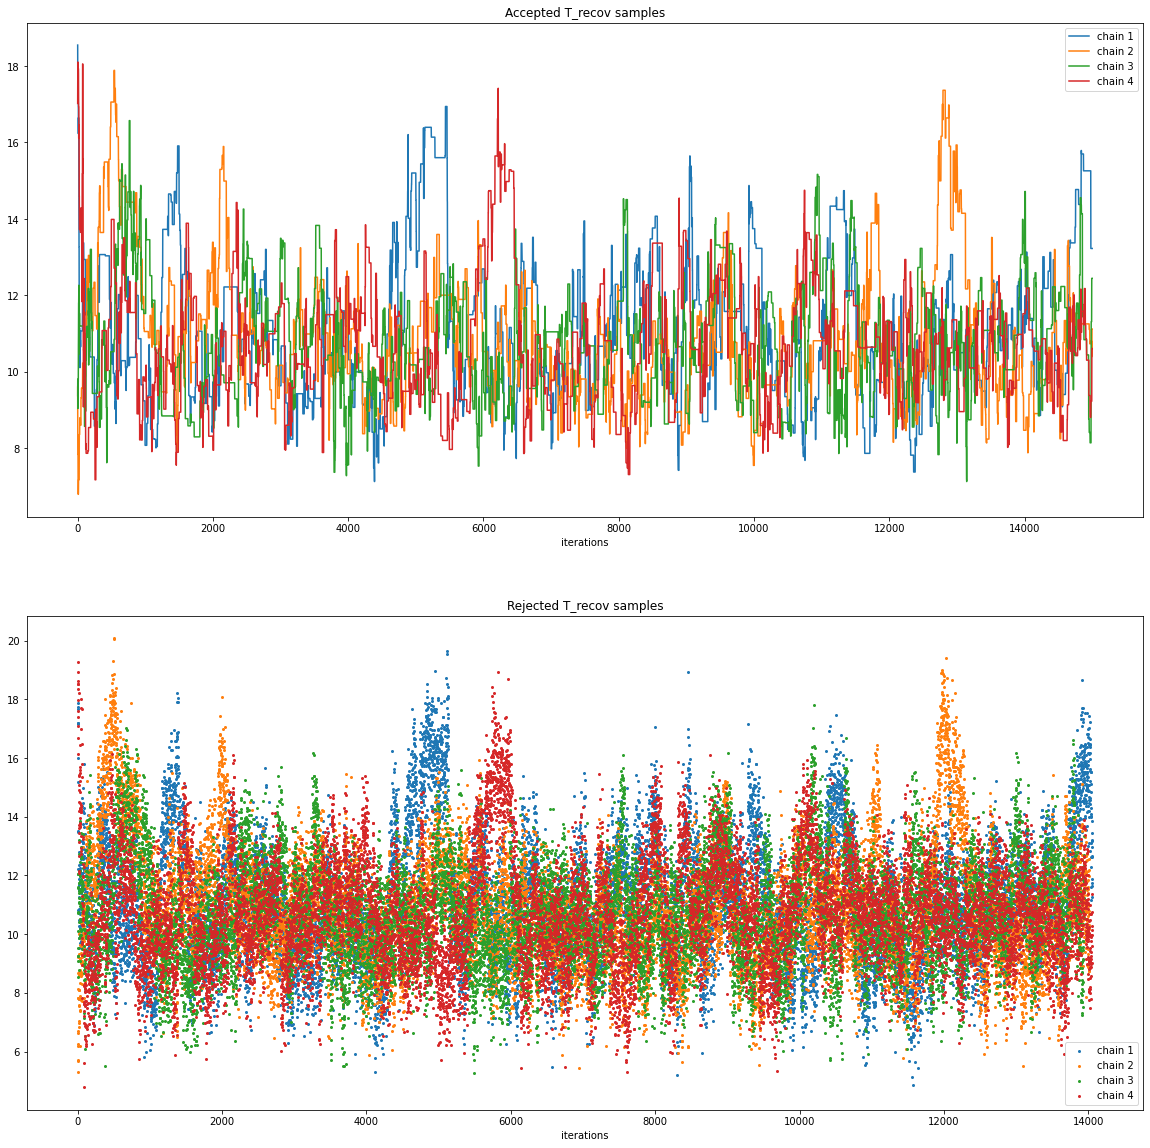

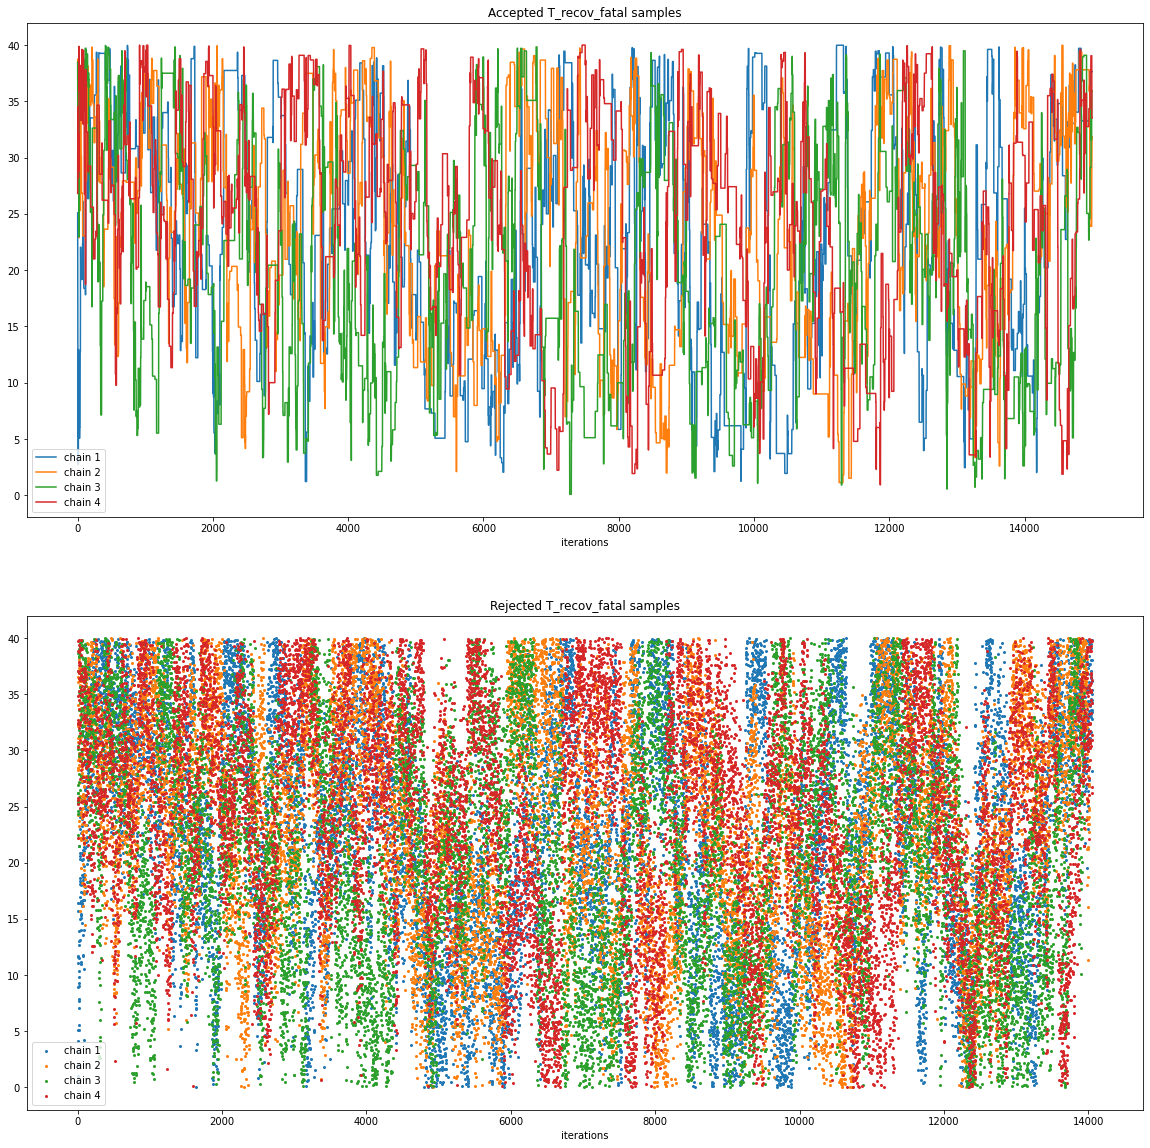

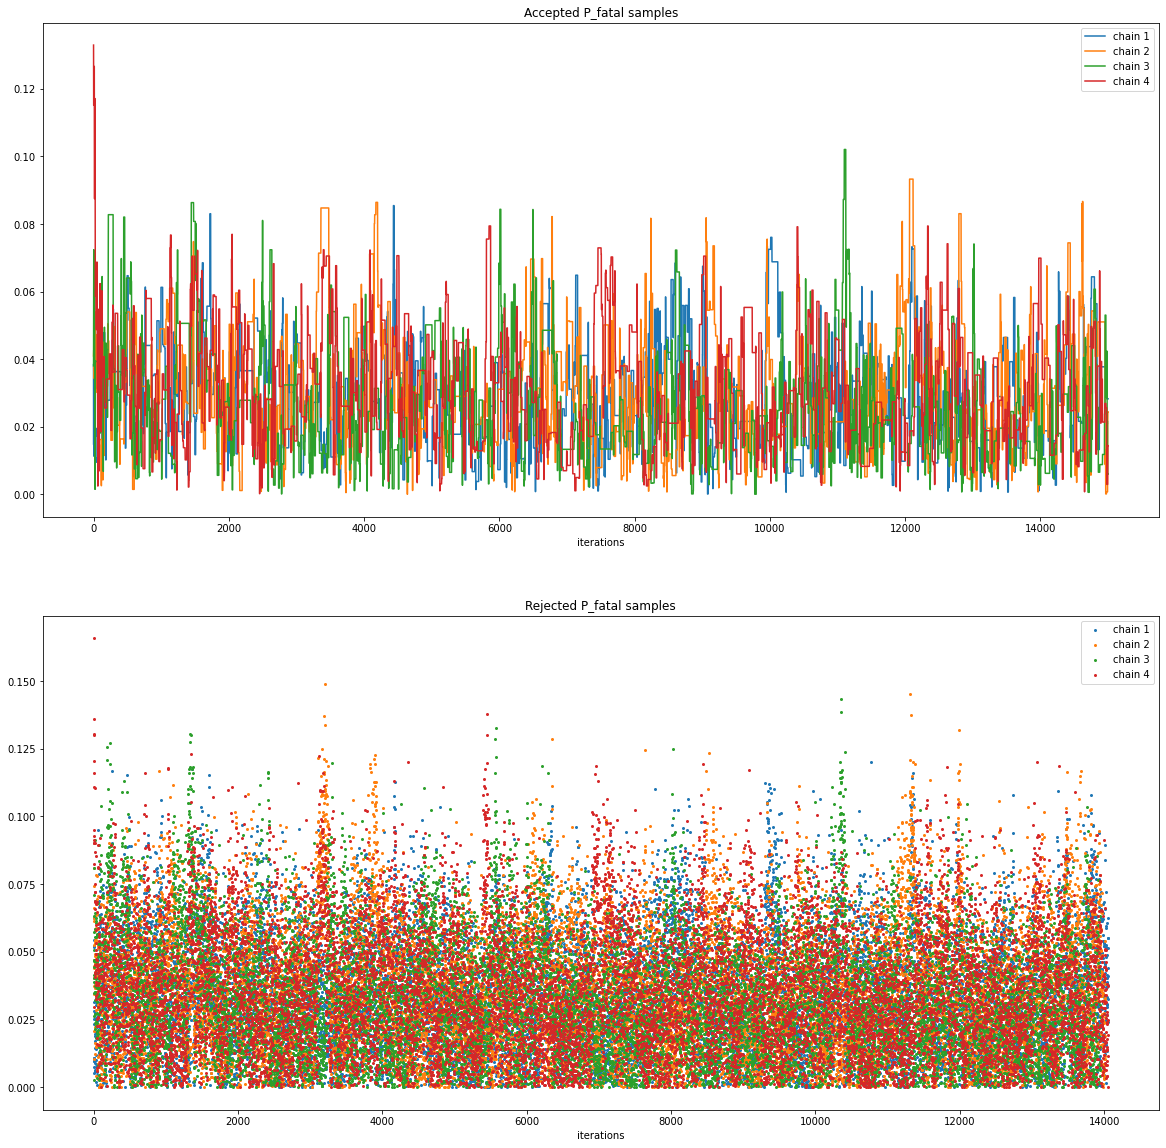

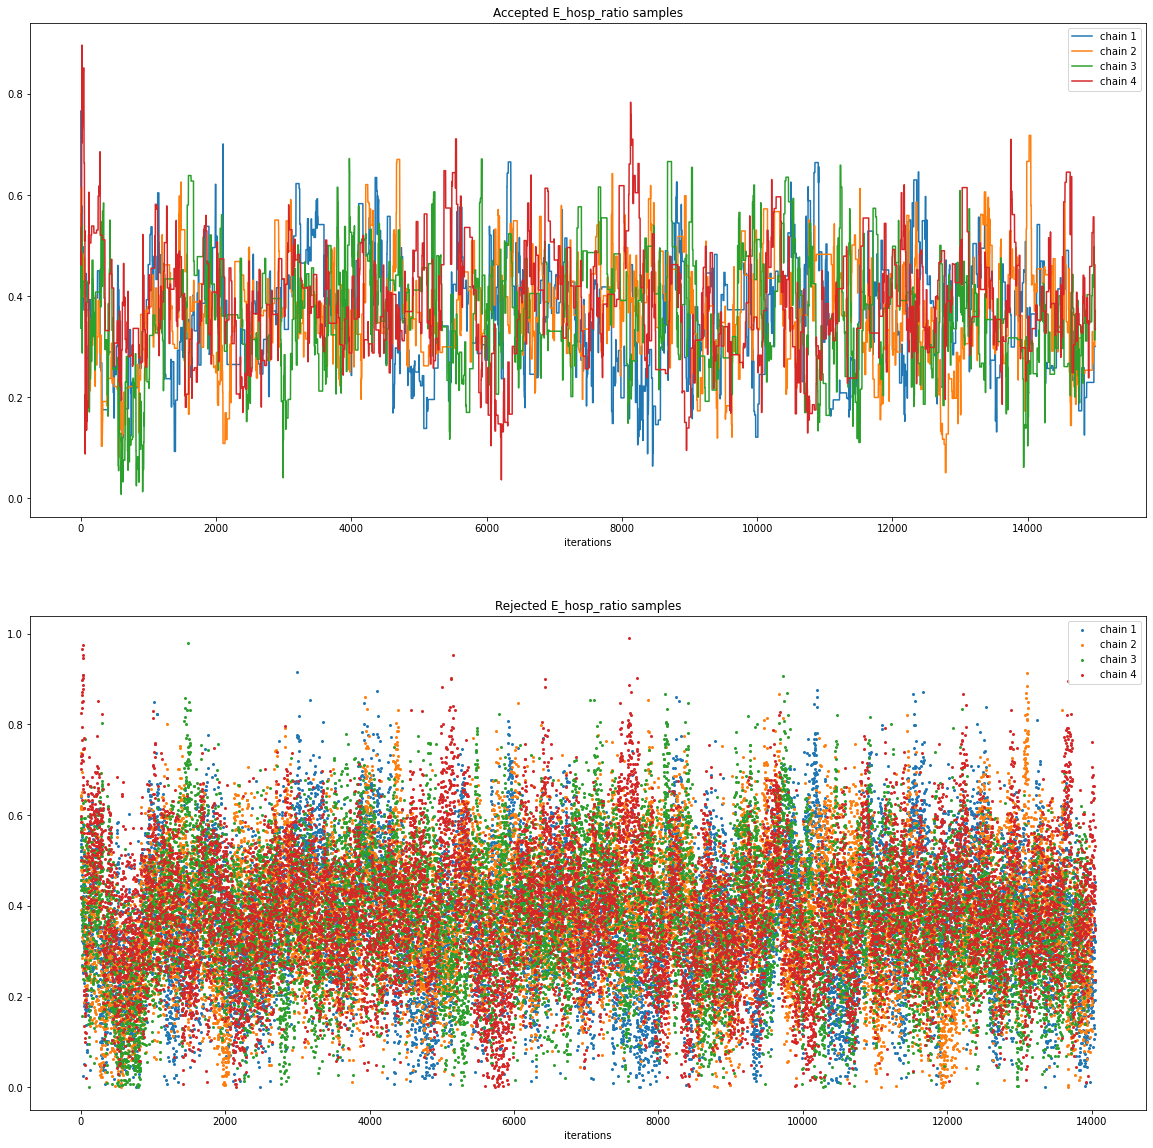

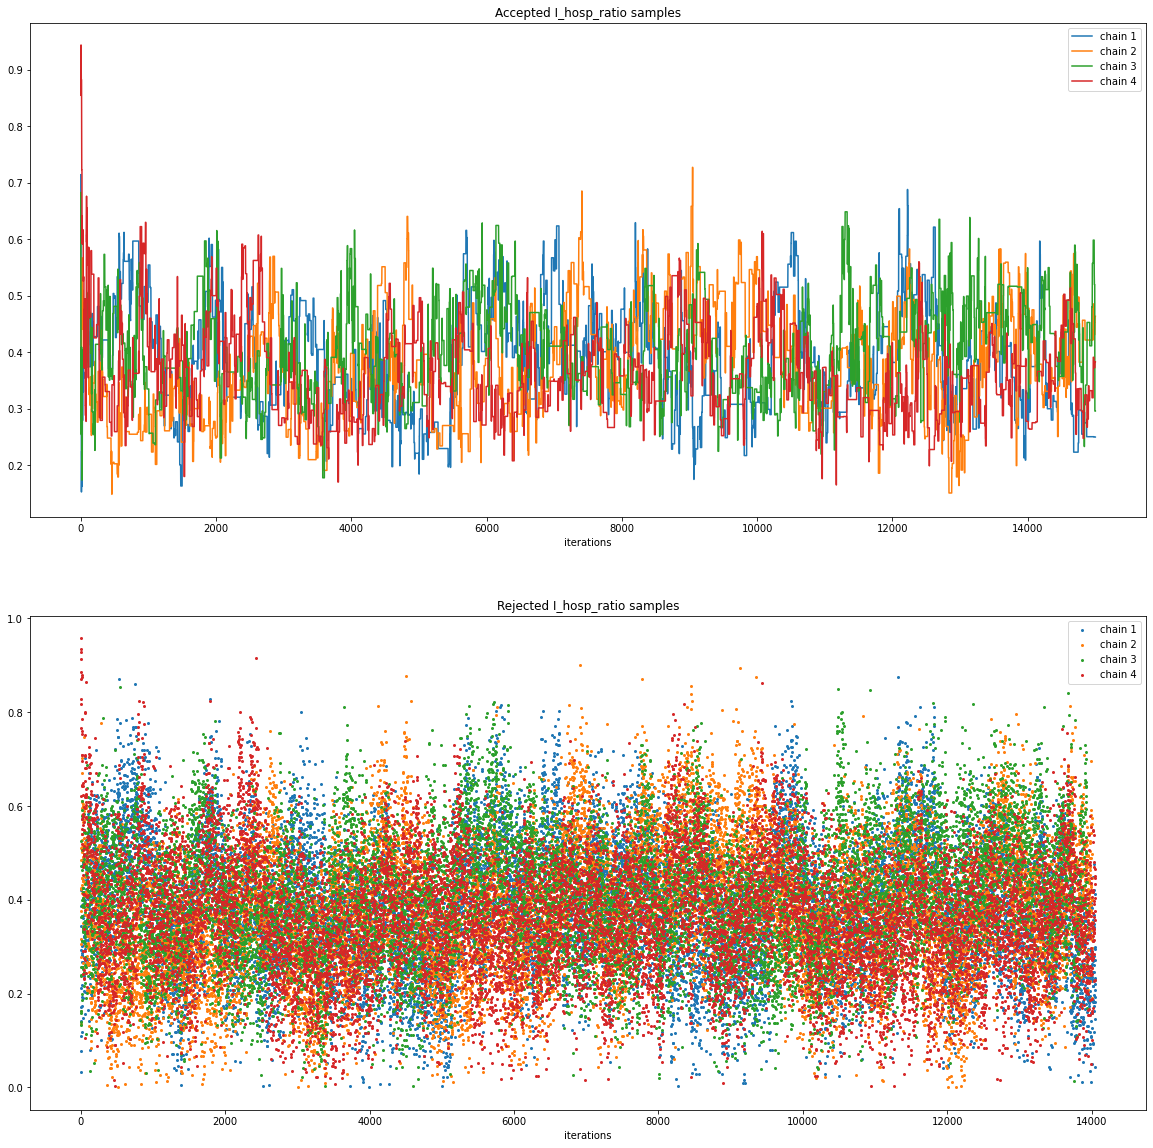

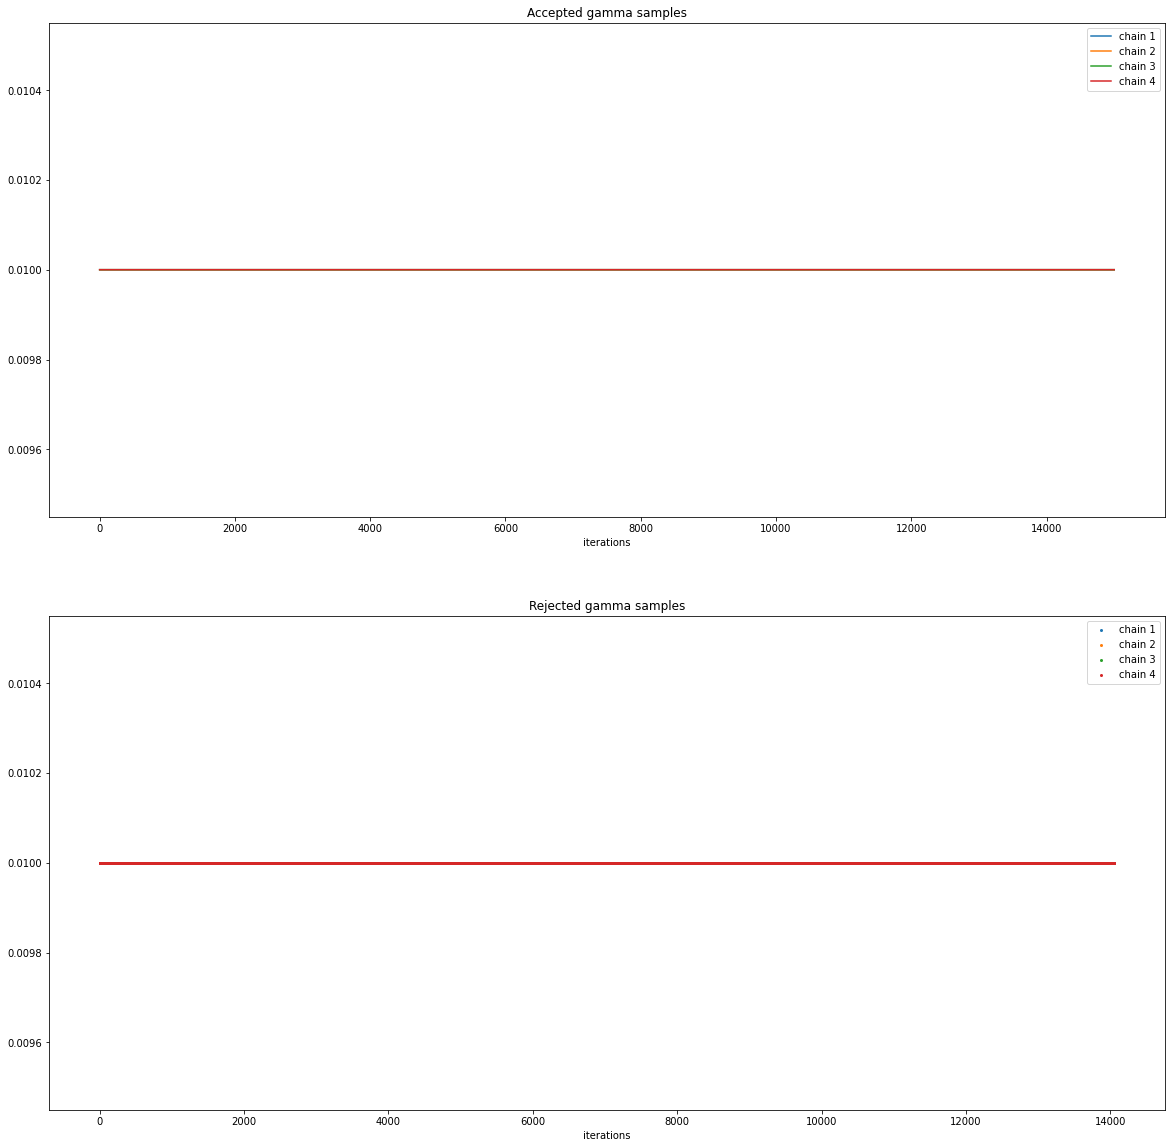

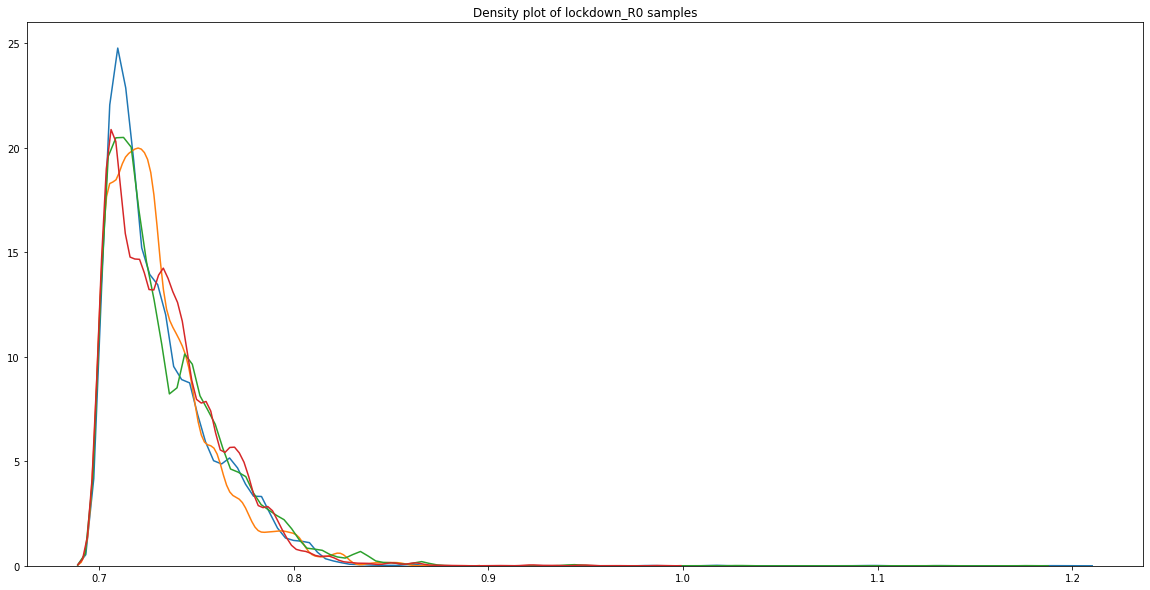

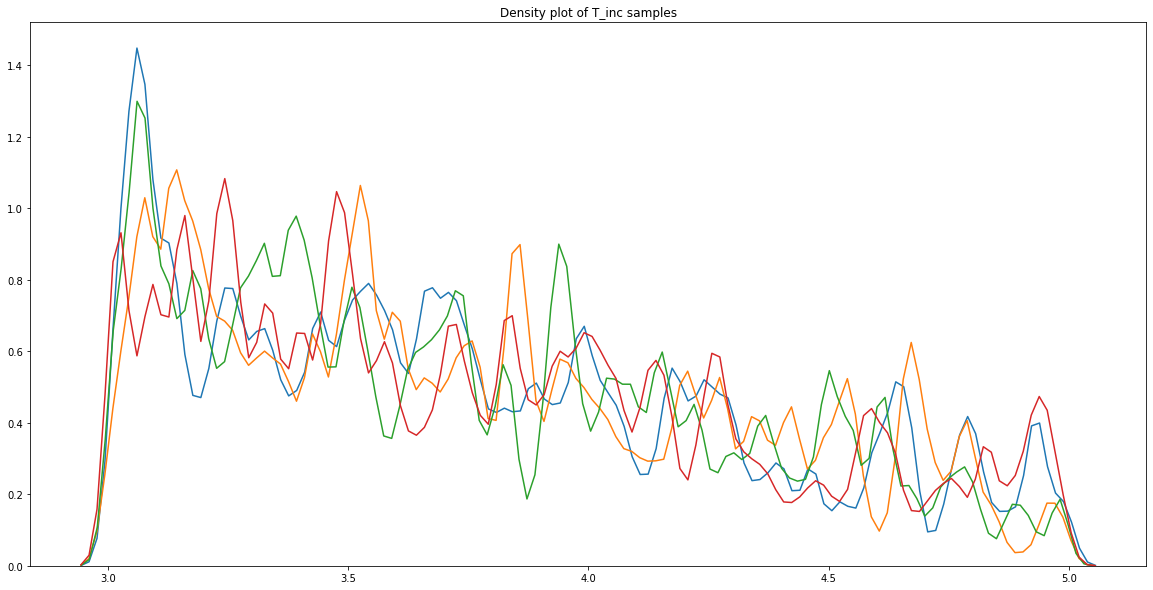

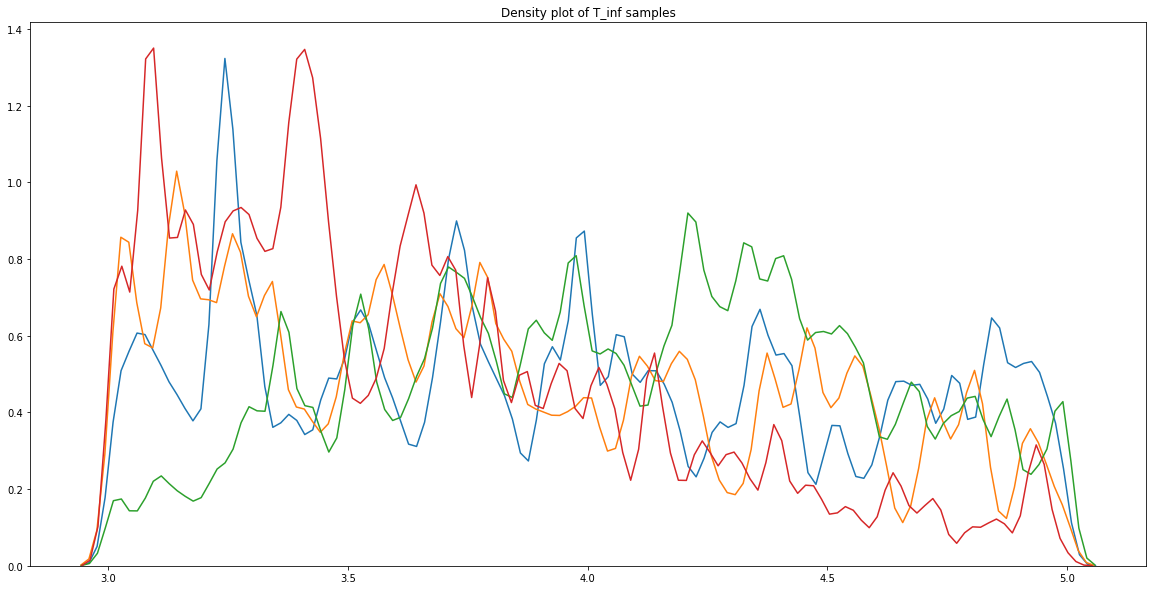

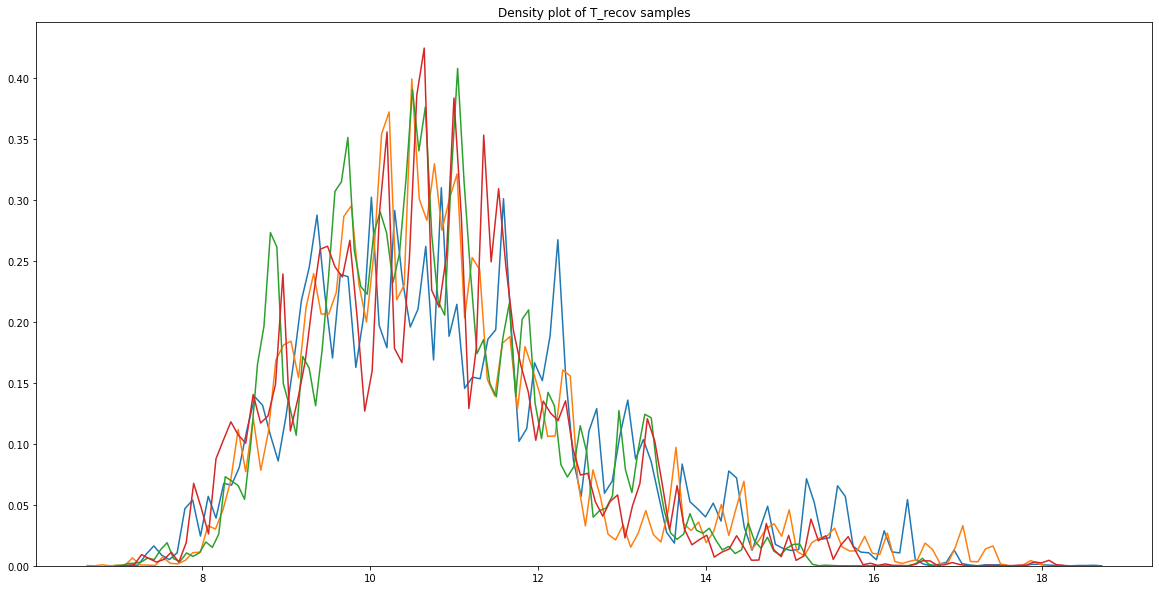

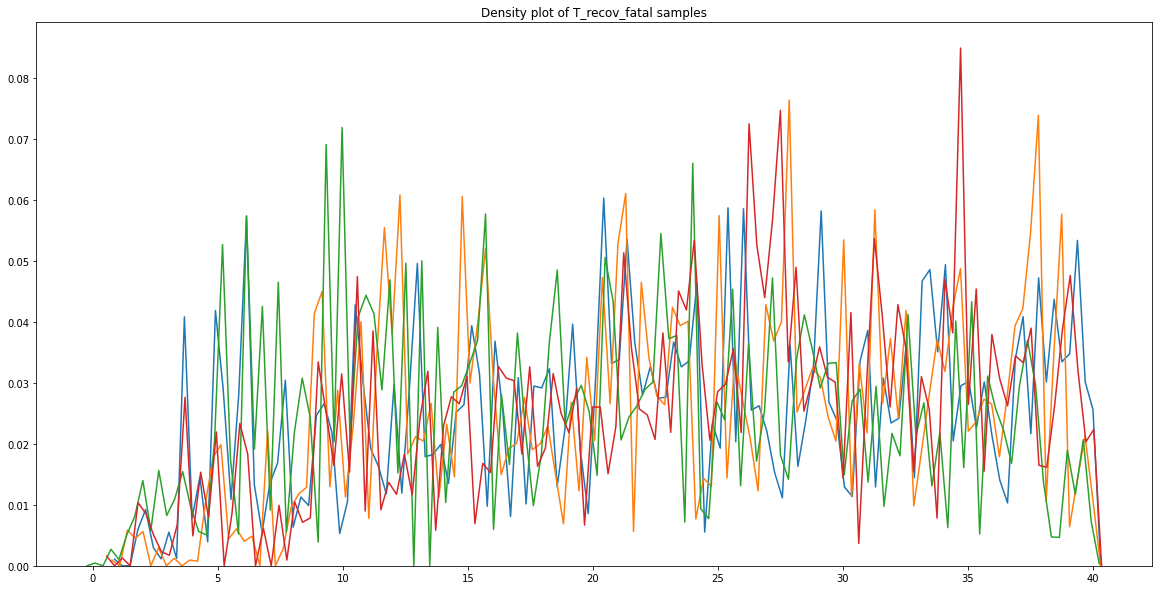

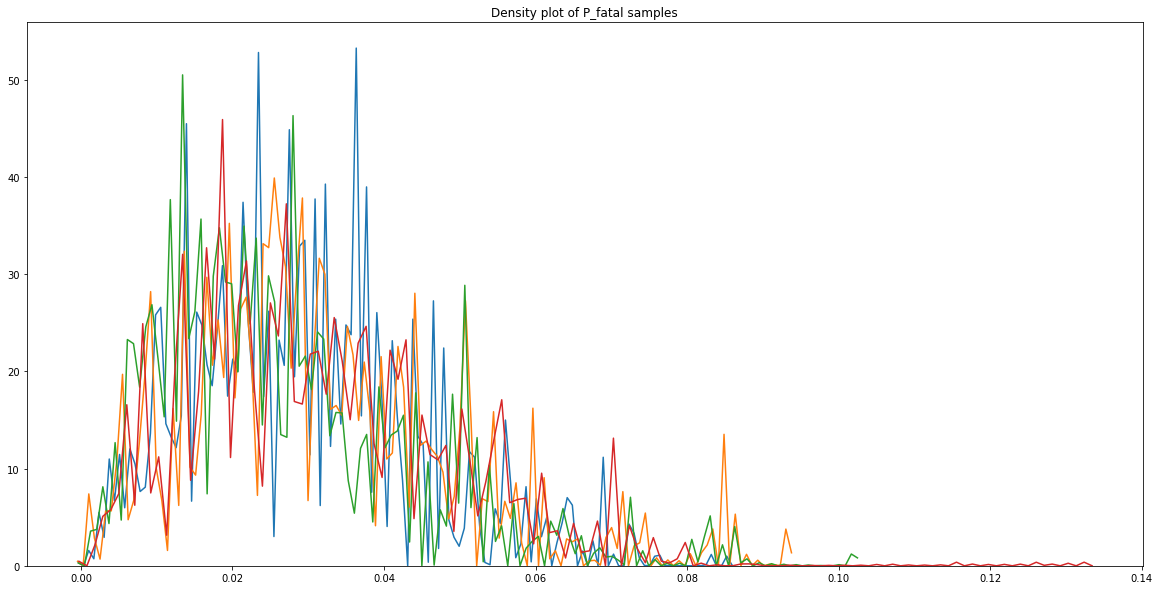

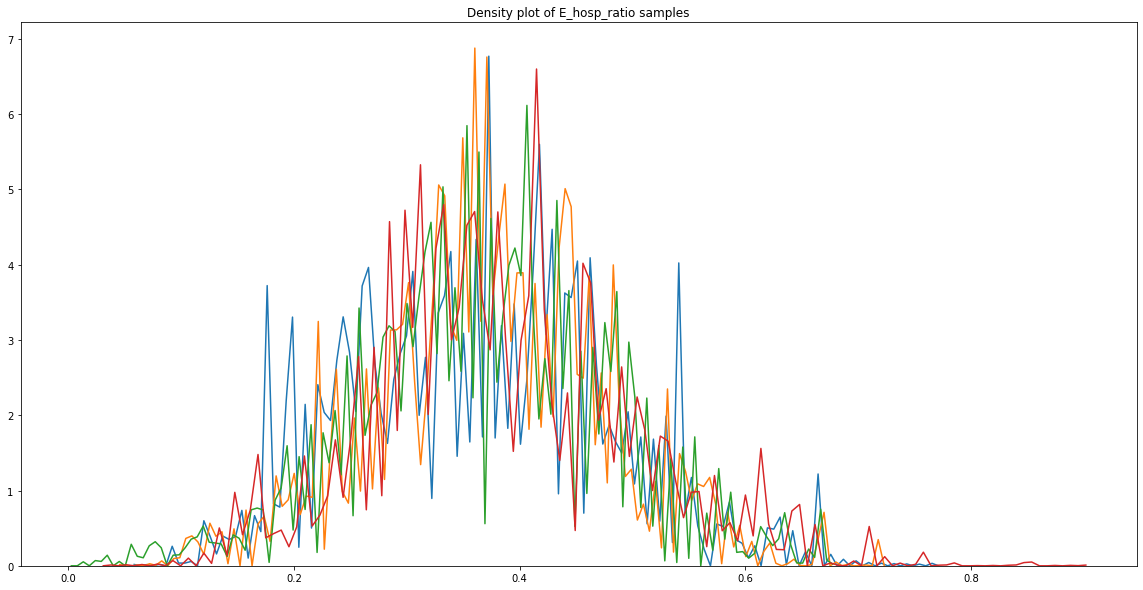

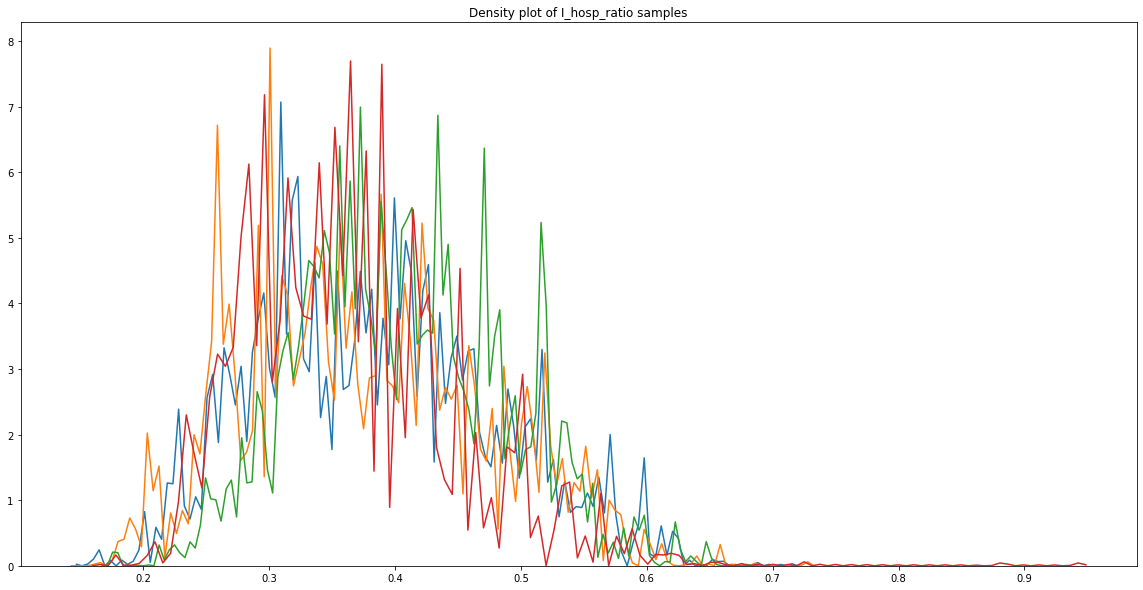

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


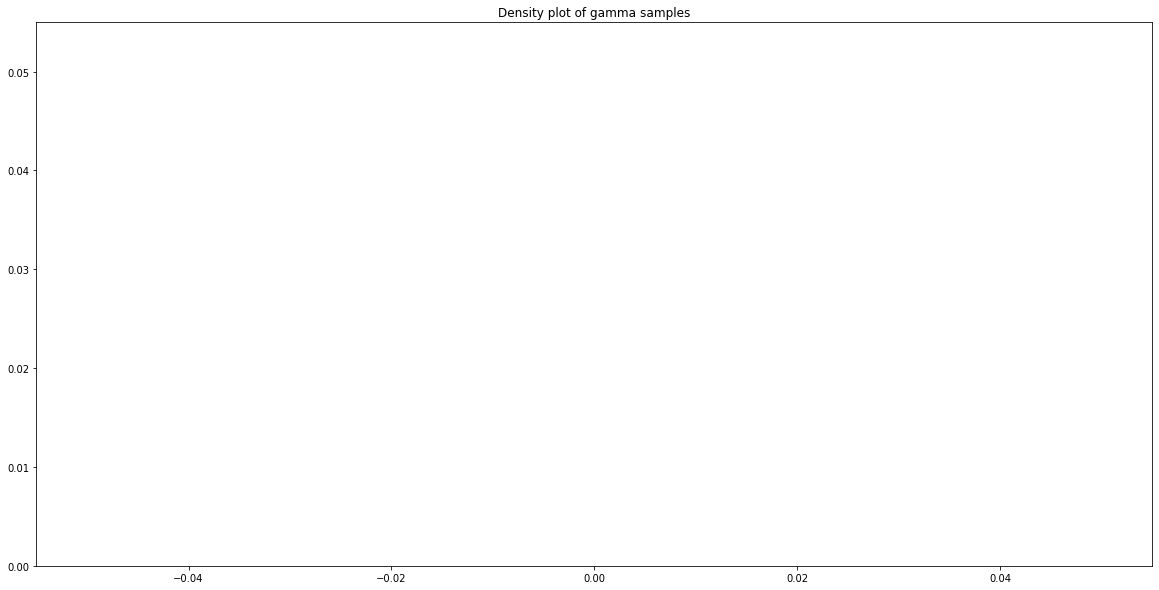

100%|██████████| 1500/1500 [00:13<00:00, 114.13it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7468980538681794), ('T_inc', 3.9360988453930905), ('T_inf', 3.2000207672385814), ('T_recov', 11.054003813851224), ('T_recov_fatal', 37.46943323061274), ('P_fatal', 0.0490086435227168), ('E_hosp_ratio', 0.3790295960143442), ('I_hosp_ratio', 0.29017449967690123), ('gamma', 0.01)])


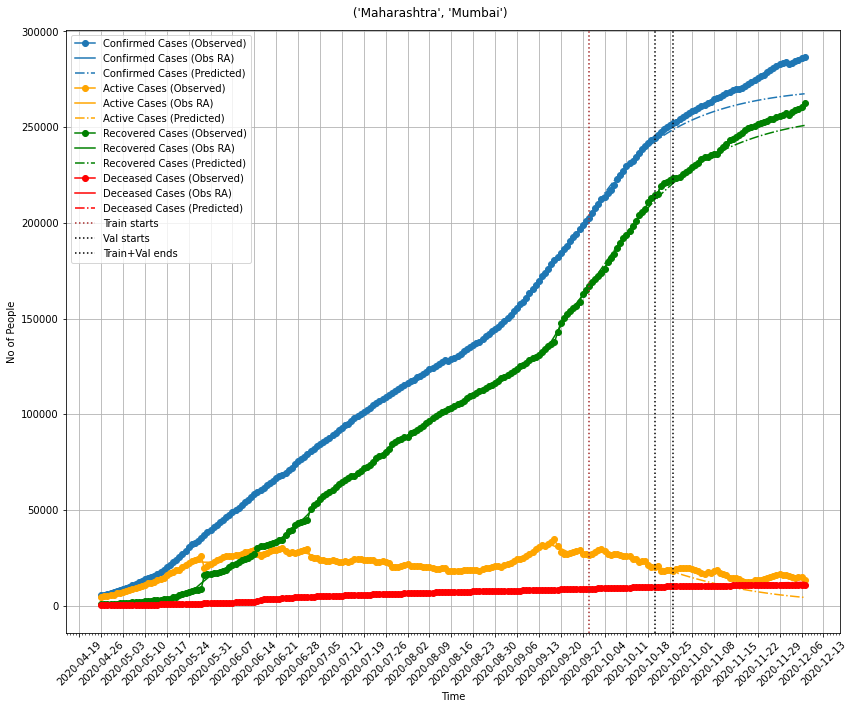

In [11]:
predictions_dict['m1'] = single_fitting_cycle(**copy.deepcopy(config['fitting'])) 

# m2_params = copy.deepcopy(config['fitting'])
# m2_params['split']['val_period'] = 0
# predictions_dict['m2'] = single_fitting_cycle(**m2_params)

# predictions_dict['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")

In [ ]:
predictions_dict['m1']['best_params']

In [9]:
predictions_dict['m2']['best_params']

OrderedDict([('lockdown_R0', 0.7311692841246625),
             ('T_inc', 3.5445667912717616),
             ('T_inf', 4.447315532970595),
             ('T_recov', 9.860107729274022),
             ('T_recov_fatal', 32.01372316356123),
             ('P_fatal', 0.04853085298224195),
             ('E_hosp_ratio', 0.20874665190813108),
             ('I_hosp_ratio', 0.43744106695984986),
             ('sigma', 0.036628302488701886)])

## Loss Dataframes

### M1 Loss DataFrame

In [10]:
predictions_dict['m1']['df_loss']

train       val
total      0.430333  0.565316
active      2.46616   6.01006
recovered  0.609591   1.09329
deceased   0.148595   1.20522

### M2 Loss DataFrame

In [11]:
predictions_dict['m2']['df_loss']

train
total       0.15851
active      2.73088
recovered  0.274494
deceased   0.538658

## Sensitivity Plot

100%|██████████| 101/101 [00:00<00:00, 103.53it/s]


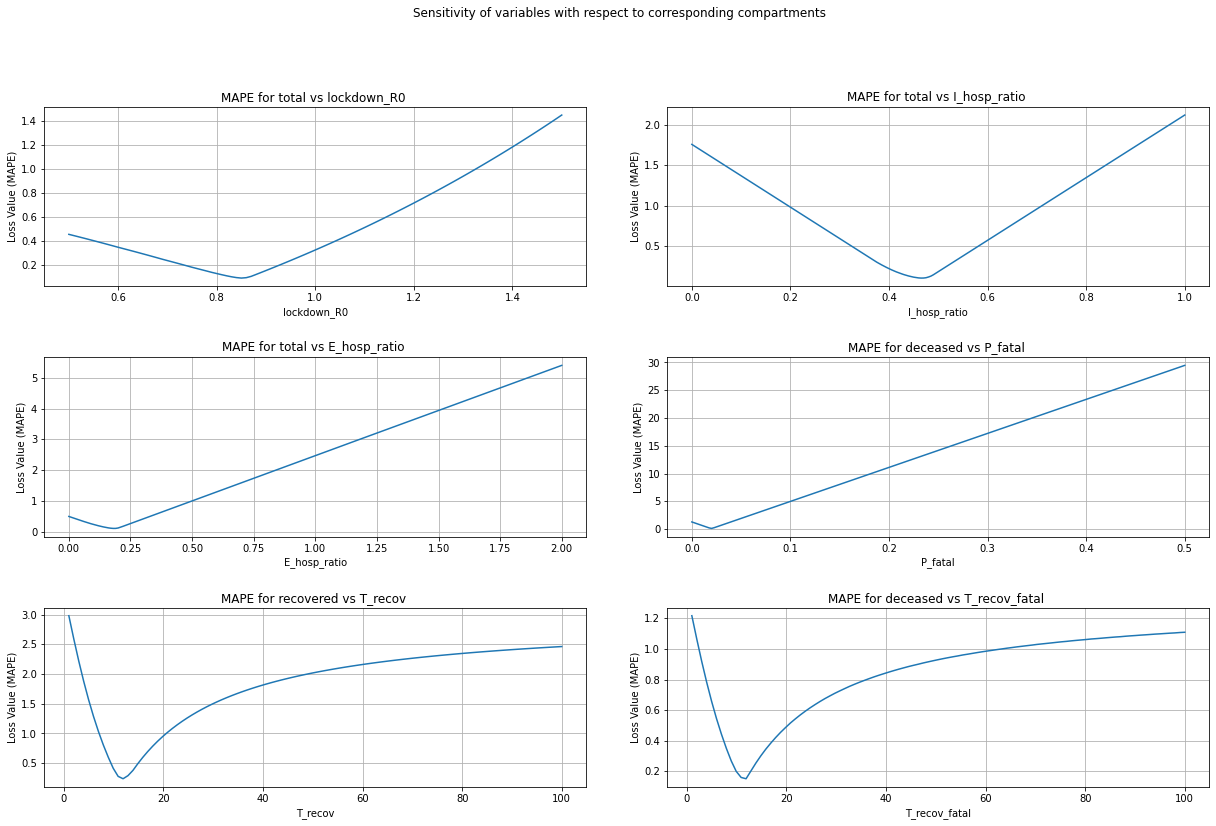

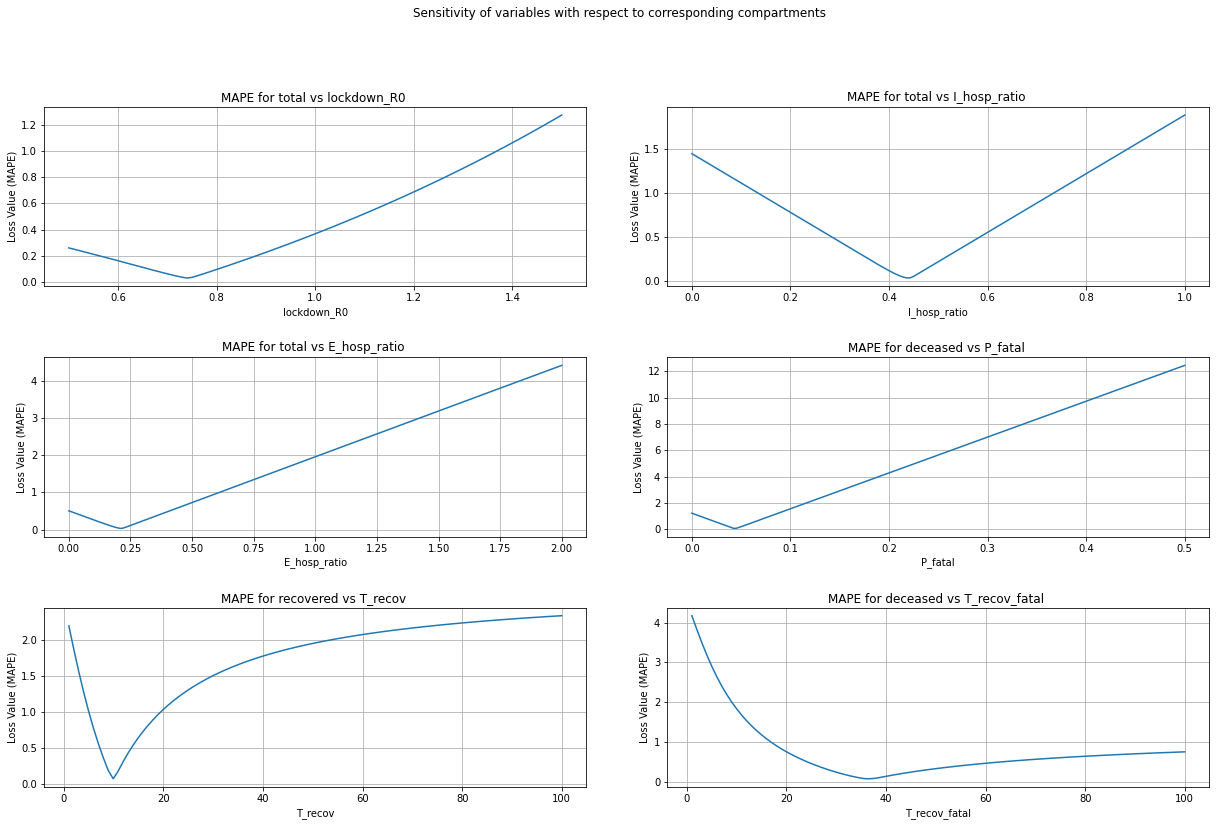

In [12]:
predictions_dict['m1']['plots']['sensitivity'], _, _ = calculate_sensitivity_and_plot(predictions_dict, config, which_fit='m1')
predictions_dict['m2']['plots']['sensitivity'], _, _ = calculate_sensitivity_and_plot(predictions_dict, config, which_fit='m2')

## Plot Forecasts

0it [00:00, ?it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 129.65it/s]
14it [00:00, 135.35it/s]

getting forecasts ..


1500it [00:11, 133.15it/s]


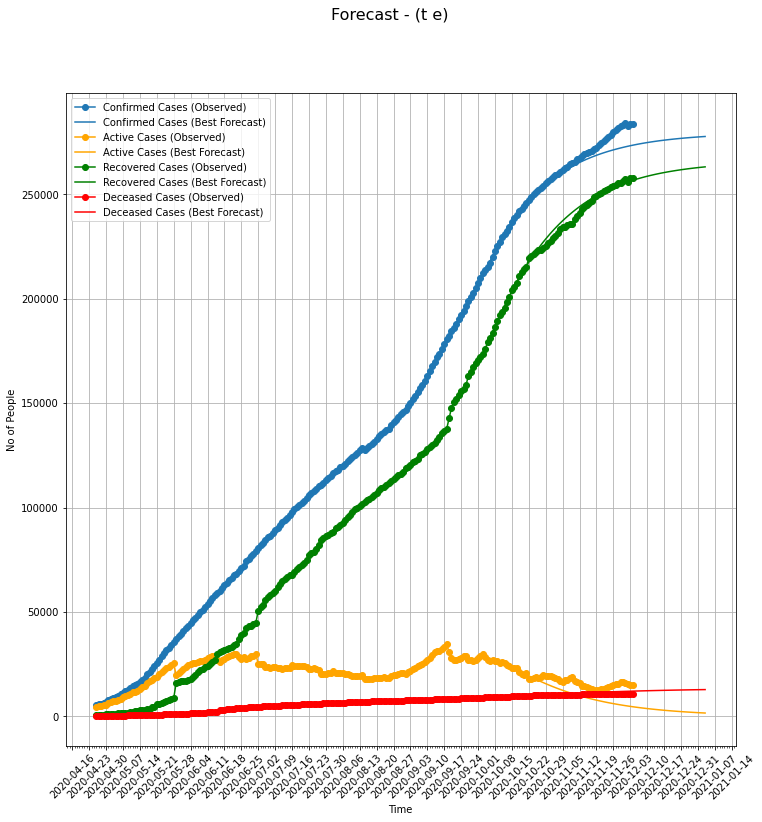

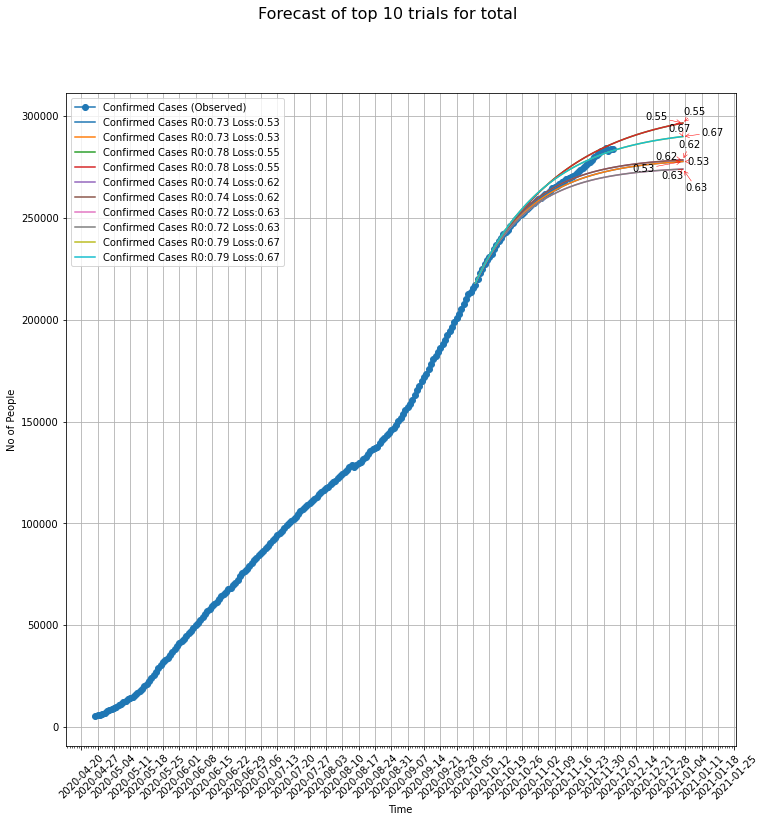

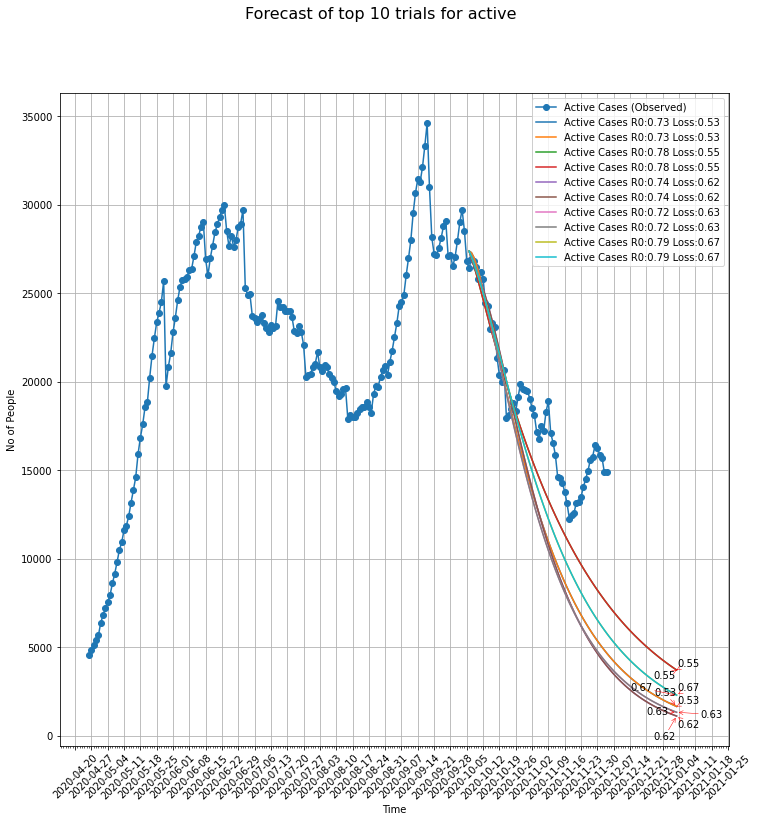

In [13]:
predictions_dict['m2']['forecasts'] = {}
predictions_dict['m2']['forecasts']['best'] = get_forecast(predictions_dict, train_fit='m2', 
                                                           model=config['fitting']['model'], 
                                                           forecast_days=config['forecast']['forecast_days'])

predictions_dict['m2']['plots']['forecast_best'] = plot_forecast(predictions_dict, 
                                                                 'test', 
                                                                 error_bars=False)

predictions_dict['m1']['trials_processed'] = forecast_all_trials(predictions_dict, train_fit='m1', 
                                                                 model=config['fitting']['model'], 
                                                                 forecast_days=config['forecast']['forecast_days'])

predictions_dict['m2']['trials_processed'] = forecast_all_trials(predictions_dict, train_fit='m2', 
                                                                 model=config['fitting']['model'], 
                                                                 forecast_days=config['forecast']['forecast_days'])

kforecasts = plot_top_k_trials(predictions_dict, train_fit='m2',
                               k=config['forecast']['num_trials_to_plot'],
                               which_compartments=config['forecast']['plot_topk_trials_for_columns'])
                               
predictions_dict['m2']['plots']['forecasts_topk'] = {}
for column in config['forecast']['plot_topk_trials_for_columns']:
    predictions_dict['m2']['plots']['forecasts_topk'][column.name] = kforecasts[column]

## Uncertainty + Uncertainty Forecasts

In [27]:
uncertainty_args = {'predictions_dict': predictions_dict, 'fitting_config': config['fitting'],
                    'forecast_config': config['forecast'], **config['uncertainty']['uncertainty_params']}
                    
uncertainty = config['uncertainty']['method'](**uncertainty_args)

14it [00:00, 134.35it/s]

getting forecasts ..


1500it [00:10, 142.63it/s]


In [28]:
uncertainty.ensemble_mean_forecast['df_loss']

{'active': 15.575467856685915,
 'recovered': 0.5673764383503023,
 'deceased': 6.102334618865645,
 'total': 0.9306119389365023}

In [22]:
uncertainty_forecasts = uncertainty.get_forecasts()
for key in uncertainty_forecasts.keys():
    predictions_dict['m2']['forecasts'][key] = uncertainty_forecasts[key]['df_prediction']
    
predictions_dict['m2']['forecasts']['ensemble_mean'] = uncertainty.ensemble_mean_forecast

In [26]:
uncertainty_forecasts[2.5]['df_loss_perc']

train       val
total  0.0648389  0.882782

In [23]:
predictions_dict['m2']['beta'] = uncertainty.beta
predictions_dict['m2']['beta_loss'] = uncertainty.beta_loss
predictions_dict['m2']['deciles'] = uncertainty_forecasts

AttributeError: 'MCUncertainty' object has no attribute 'beta_loss'

ValueError: Could not interpret input 'date'

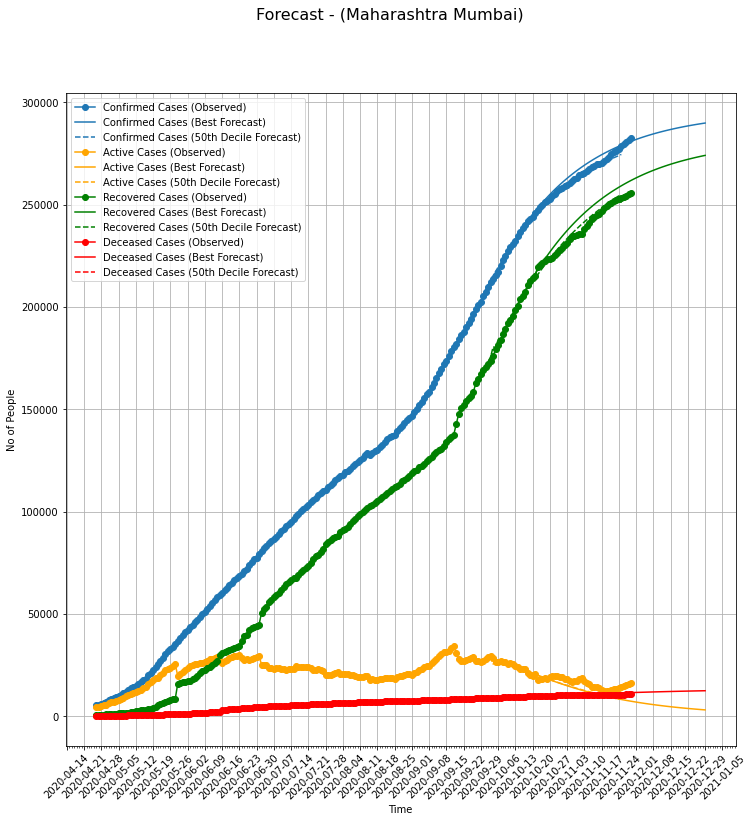

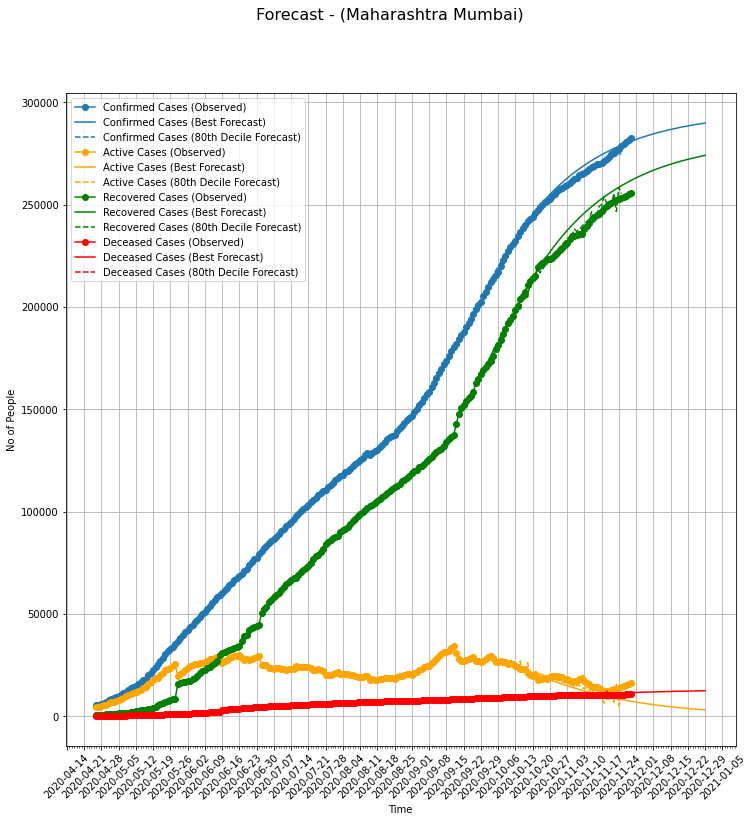

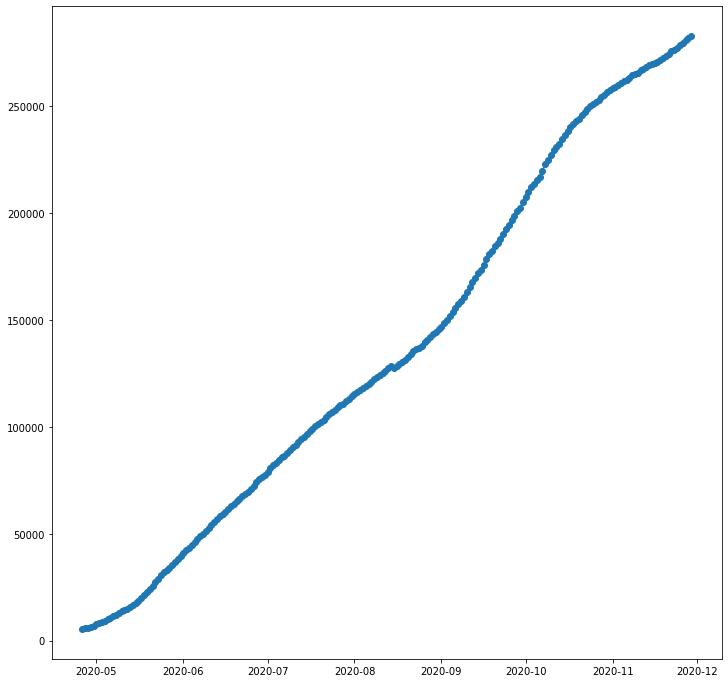

In [25]:
predictions_dict['m2']['plots']['forecast_best_50'] = plot_forecast(predictions_dict, 
                                                                    (config['fitting']['data']['dataloading_params']['state'], 
                                                                     config['fitting']['data']['dataloading_params']['district']),
                                                                    fits_to_plot=['best', 50], error_bars=False)
predictions_dict['m2']['plots']['forecast_best_80'] = plot_forecast(predictions_dict, 
                                                                    (config['fitting']['data']['dataloading_params']['state'], 
                                                                     config['fitting']['data']['dataloading_params']['district']),
                                                                    fits_to_plot=['best', 80], error_bars=False)
predictions_dict['m2']['plots']['forecast_ensemble_mean_50'] = plot_forecast(predictions_dict, 
                                                                             (config['fitting']['data']['dataloading_params']['state'], 
                                                                              config['fitting']['data']['dataloading_params']['district']),
                                                                             fits_to_plot=['ensemble_mean', 50], error_bars=False)

In [20]:
ptiles_plots = plot_ptiles(predictions_dict, which_compartments=config['forecast']['plot_ptiles_for_columns'])
predictions_dict['m2']['plots']['forecasts_ptiles'] = {}
for column in config['forecast']['plot_ptiles_for_columns']:
    predictions_dict['m2']['plots']['forecasts_ptiles'][column.name] = ptiles_plots[column]

TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

## Create Report

In [ ]:
save_dict_and_create_report(predictions_dict, config, ROOT_DIR=output_folder, config_filename=config_filename)

## Create Output CSV

In [ ]:
df_output = create_decile_csv_new(predictions_dict)
df_output.to_csv(f'{output_folder}/deciles.csv')

## Log on W&B

In [ ]:
wandb.init(project="covid-modelling", config=wandb_config)

In [ ]:
log_wandb(predictions_dict)

## Create All Trials Output

In [ ]:
df_all = create_all_trials_csv(predictions_dict)
df_all.to_csv(f'{output_folder}/all_trials.csv')